## This file aim to analyse the Market Performance in a time range and Time for the Market Recover

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

## Merge N225.csv and N225_companies_stock.csv

In [2]:
# Define the base directory for the stock and companies files
base_dir_stocks = r'C:\Users\dongv\OneDrive\Desktop\Techlabs\Techlabs_WS_Team3\01_data\02_pre\N225_Japan'

# Define the directory for the earthquake file
base_dir_earthquake = r'C:\Users\dongv\OneDrive\Desktop\Techlabs\Techlabs_WS_Team3\01_data\02_pre'

In [ ]:
# Load datasets with full paths
df_earthquake = pd.read_csv(f'{base_dir_earthquake}\\clean_major_earthquakes.csv', parse_dates=['date']) # parse_dates convert the 'date' column from a string(text) format into a datatime format
df_stocks = pd.read_csv(f'{base_dir_stocks}\\N225_companies_stock.csv', parse_dates=['Date'])
df_companies = pd.read_csv(f'{base_dir_stocks}\\N225.csv')

In [3]:
# Display dataset
print(df_stocks.head())
print('---')
print(df_earthquake.head())
print('---')
print(df_companies.head())


        Date        Open       Close   Volume  Ticker
0 2007-01-04  738.792367  738.072998   912000  4151.T
1 2007-01-05  735.195537  722.246887  1761000  4151.T
2 2007-01-09  710.017444  725.843567  1747000  4151.T
3 2007-01-10  730.879162  720.088623  1633000  4151.T
4 2007-01-11  720.807986  710.736816  1816000  4151.T
---
   tsunami  significance   data_type  magnitude              state  longitude  \
0        0           613  earthquake        6.3   Papua New Guinea    146.884   
1        0           557  earthquake        6.0          Indonesia    101.032   
2        0           671  earthquake        6.6             Canada   -130.746   
3        0           630  earthquake        6.4             Canada   -130.542   
4        0           920  earthquake        6.2             Greece     22.693   

   latitude  depth       date                   time  
0    -5.878   34.0 2008-01-01  18:54:59.010000+00:00  
1    -2.782   35.0 2008-01-04  07:29:18.300000+00:00  
2    51.254   15.0 2

In [4]:
# Check for missing, duplicate data

# 0. Convert 'Date' column to string to ensure .str accessor works
df_stocks['Date'] = df_stocks['Date'].astype(str)

# 1. Remove rows where the 'Date' column doesn't match the expected date format
df_stocks = df_stocks[df_stocks['Date'].str.match(r'\d{4}-\d{2}-\d{2}', na=False)]

# 2. Convert the 'Date' column to datetime
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'], format='%Y-%m-%d', errors='coerce')

In [5]:
# 3. Check for rows with invalid dates
invalid_dates = df_stocks[df_stocks['Date'].isna()]
print("Rows with invalid dates:")
print(invalid_dates)

Rows with invalid dates:
Empty DataFrame
Columns: [Date, Open, Close, Volume, Ticker]
Index: []


In [6]:
# 4. Check for missing values in each column
missing_values = df_stocks.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Date      0
Open      0
Close     0
Volume    0
Ticker    0
dtype: int64


In [7]:
# 5. Check for missing rows (e.g., gaps in the Date column)
full_date_range = pd.date_range(start=df_stocks['Date'].min(), end=df_stocks['Date'].max(), freq='D')
missing_dates = full_date_range.difference(df_stocks['Date'])
print("\nMissing dates:")
print(missing_dates)


Missing dates:
DatetimeIndex(['2007-01-06', '2007-01-07', '2007-01-08', '2007-01-13',
               '2007-01-14', '2007-01-20', '2007-01-21', '2007-01-27',
               '2007-01-28', '2007-02-03',
               ...
               '2025-02-08', '2025-02-09', '2025-02-11', '2025-02-15',
               '2025-02-16', '2025-02-22', '2025-02-23', '2025-02-24',
               '2025-03-01', '2025-03-02'],
              dtype='datetime64[ns]', length=2172, freq=None)


In [8]:
# 6. Check for duplicate rows
duplicate_rows = df_stocks[df_stocks.duplicated()]
print("\nDuplicate rows:")
print(duplicate_rows)


Duplicate rows:
Empty DataFrame
Columns: [Date, Open, Close, Volume, Ticker]
Index: []


In [9]:
# 7. Check for invalid values (e.g., Volume = 0)
invalid_volume = df_stocks[df_stocks['Volume'] == 0]
print("\nRows with Volume = 0:")
print(invalid_volume)


Rows with Volume = 0:
             Date         Open        Close  Volume  Ticker
666    2009-09-21   839.895752   839.895752       0  4151.T
2198   2015-12-25  1576.366699  1576.366699       0  4151.T
2330   2016-07-11  1528.883301  1528.883301       0  4151.T
2580   2017-07-17  1721.441040  1721.441040       0  4151.T
2599   2017-08-11  1730.201538  1730.201538       0  4151.T
...           ...          ...          ...     ...     ...
972601 2018-09-24  1841.499268  1841.499268       0  9532.T
972611 2018-10-08  1878.476807  1878.476807       0  9532.T
972645 2018-11-23  1802.206665  1802.206665       0  9532.T
972666 2018-12-24  1722.508545  1722.508545       0  9532.T
972671 2018-12-31  1721.651855  1721.651855       0  9532.T

[6388 rows x 5 columns]


In [10]:
# Merge df_stocks with df_companies on 'Ticker'
merged_df = pd.merge(
    df_stocks, 
    df_companies, 
    on='Ticker', 
    how='left'  # Use 'left' to keep all rows from df_stocks
)

# Reorder the columns
column_order = ['Ticker', 'Company_name', 'Industry', 'Date', 'Open', 'Close', 'Volume']
merged_df = merged_df[column_order]

# Filter data to include only rows from the year 2007 onward
merged_df = merged_df[merged_df['Date'] >= '2007-01-01']

 # Convert 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
    
# Display the resulting DataFrame
print(merged_df.head())

   Ticker           Company_name         Industry       Date        Open  \
0  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals 2007-01-04  738.792367   
1  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals 2007-01-05  735.195537   
2  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals 2007-01-09  710.017444   
3  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals 2007-01-10  730.879162   
4  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals 2007-01-11  720.807986   

        Close   Volume  
0  738.072998   912000  
1  722.246887  1761000  
2  725.843567  1747000  
3  720.088623  1633000  
4  710.736816  1816000  


In [ ]:
# Save result to new csv file
#merged_df.to_csv(f'{base_dir_stocks}\\clean_N225_stocks_data.csv', index=False)

# N225 (Japan) Stock Market Performance

In [ ]:
# Load the datasets

earthquake_data = pd.read_csv(f'{base_dir_earthquake}\\clean_major_earthquakes.csv') # magnitude >= 6, 2008-2023
japan_stock_data = pd.read_csv(f'{base_dir_stocks}\\clean_N225_stocks_data.csv')

print(earthquake_data.head())
print('---')
print(japan_stock_data.head())

   tsunami  significance   data_type  magnitude              state  longitude  \
0        0           613  earthquake        6.3   Papua New Guinea    146.884   
1        0           557  earthquake        6.0          Indonesia    101.032   
2        0           671  earthquake        6.6             Canada   -130.746   
3        0           630  earthquake        6.4             Canada   -130.542   
4        0           920  earthquake        6.2             Greece     22.693   

   latitude  depth        date                   time  
0    -5.878   34.0  2008-01-01  18:54:59.010000+00:00  
1    -2.782   35.0  2008-01-04  07:29:18.300000+00:00  
2    51.254   15.0  2008-01-05  11:01:06.110000+00:00  
3    51.163   10.0  2008-01-05  11:44:48.170000+00:00  
4    37.216   75.0  2008-01-06  05:14:20.180000+00:00  
---
   Ticker           Company_name         Industry        Date        Open  \
0  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals  2007-01-04  738.792367   
1  4151.T  KYOWA KI

In [12]:
# Convert the 'date', 'Date' column to datetime format and extract the date part.
earthquake_data['date'] = pd.to_datetime(earthquake_data['date']).dt.date
japan_stock_data['Date'] = pd.to_datetime(japan_stock_data['Date']).dt.date

In [13]:
# Filter Earthquake Data for Japan
# Define Japan's approximate latitude and longitude range
japan_lat_range = (24, 46)
japan_lon_range = (122, 146)

# Filter earthquakes within Japan's range
japan_earthquakes = earthquake_data[
    (earthquake_data['latitude'].between(*japan_lat_range)) &
    (earthquake_data['longitude'].between(*japan_lon_range))
]

print("Earthquakes in Japan area:")
print(japan_earthquakes)

Earthquakes in Japan area:
      tsunami  significance   data_type  magnitude          state  longitude  \
32          0           591  earthquake        6.2   Japan region   142.4380   
39          0           554  earthquake        6.0   Japan region   142.5990   
69          0           608  earthquake        6.2          Japan   141.5450   
70          0           573  earthquake        6.1          Japan   141.7560   
71          0           910  earthquake        6.9          Japan   141.5260   
...       ...           ...         ...        ...            ...        ...   
2156        0           567  earthquake        6.0   Japan region   145.0212   
2169        0           560  earthquake        6.0   Japan region   142.8148   
2182        0           692  earthquake        6.2          Japan   137.2994   
2191        0           679  earthquake        6.1          Japan   140.5281   
2194        0           617  earthquake        6.2          Japan   141.9005   

      latitu

In [14]:
# Count the number of earthquakes
num_earthquakes = japan_earthquakes[japan_earthquakes['data_type'] == 'earthquake'].shape[0]

# Print the result
print(f"Number of earthquakes: {num_earthquakes}")

Number of earthquakes: 207


In [15]:
# Merge earthquake data with India1 stock data
merged_data = pd.merge(japan_stock_data, japan_earthquakes, left_on='Date', right_on='date', how='left')

print(merged_data.head())

   Ticker           Company_name         Industry        Date        Open  \
0  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals  2007-01-04  738.792367   
1  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals  2007-01-05  735.195537   
2  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals  2007-01-09  710.017444   
3  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals  2007-01-10  730.879162   
4  4151.T  KYOWA KIRIN CO.. LTD.  Pharmaceuticals  2007-01-11  720.807986   

        Close   Volume  tsunami  significance data_type  magnitude state  \
0  738.072998   912000      NaN           NaN       NaN        NaN   NaN   
1  722.246887  1761000      NaN           NaN       NaN        NaN   NaN   
2  725.843567  1747000      NaN           NaN       NaN        NaN   NaN   
3  720.088623  1633000      NaN           NaN       NaN        NaN   NaN   
4  710.736816  1816000      NaN           NaN       NaN        NaN   NaN   

   longitude  latitude  depth date time  
0        NaN       NaN    NaN  NaN  Na

## Impact of Earthquakes on Stock Prices by Industry

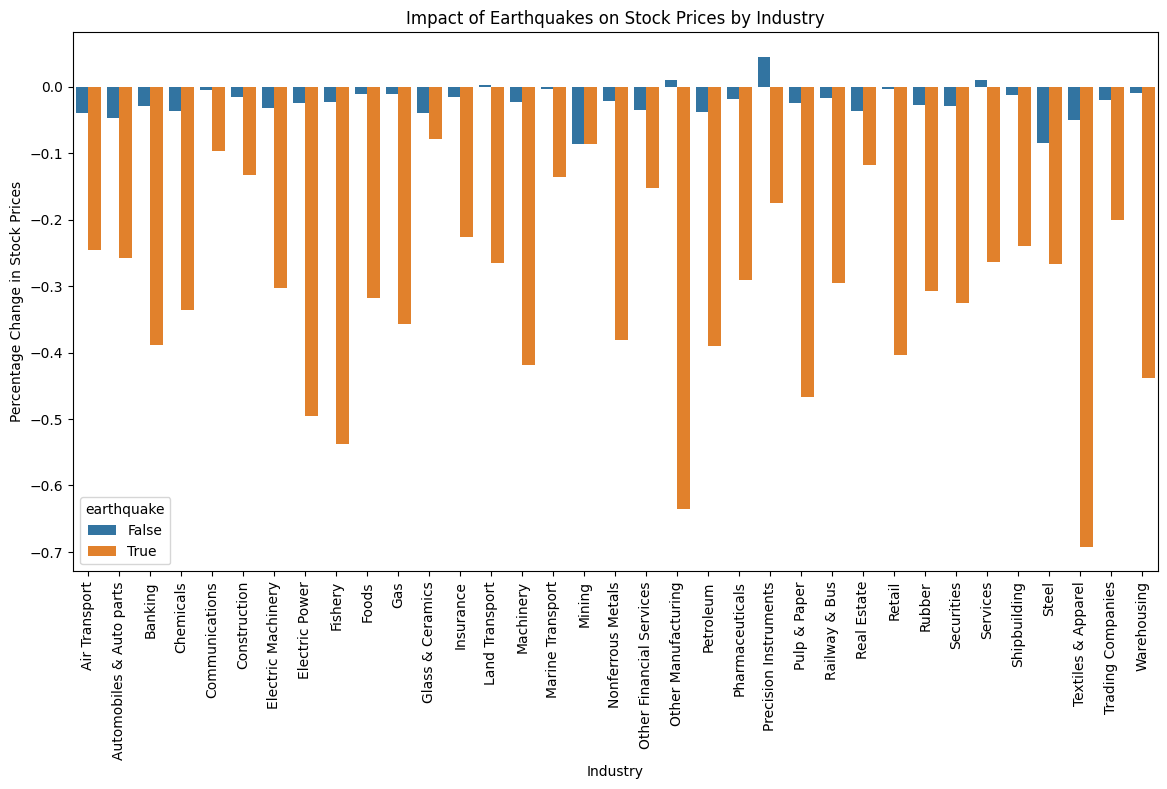

In [16]:
# Industry-wise Analysis
## To analyze the impact on different industries, we can group the data by Industry and perform similar analyses.

# Create a new column to indicate if there was an earthquake on that day
merged_data['earthquake'] = merged_data['magnitude'].notna()

# Group by Industry and earthquake to see the average change in stock prices
industry_impact_on_prices = merged_data.groupby(['Industry', 'earthquake']).agg({
    'Open': 'mean',
    'Close': 'mean'
}).reset_index()

# Calculate the percentage change in stock prices
industry_impact_on_prices['price_change'] = (industry_impact_on_prices['Close'] - industry_impact_on_prices['Open']) / industry_impact_on_prices['Open'] * 100

# Visualize the impact on stock prices by industry
plt.figure(figsize=(14, 7))
sns.barplot(x='Industry', y='price_change', hue='earthquake', data=industry_impact_on_prices)
plt.title('Impact of Earthquakes on Stock Prices by Industry')
plt.xlabel('Industry')
plt.ylabel('Percentage Change in Stock Prices')
plt.xticks(rotation=90)
plt.show()

## Explain chart: 

### False (average days that there is NO Earthquake), True (average days that there is Earthquake)
### The height of each bar represents the average percentage price change
#### - Negative Impact: If the 'earthquake=True' bar is lower (or negative), earthquakes may correlate with stock declines .
#### - Positive Impact: If the 'earthquake=True' bar is higher, industries might benefit 
#### - No Impact: Bars of similar height suggest earthquakes have no measurable effect.

### => In here, all industries have Negative Impact (True > False)

In [17]:
# Number of Industries Affected
## To determine the number of industries affected by earthquakes, we can count the unique industries in the merged dataset.
unique_industries = merged_data['Industry'].nunique()

print(f"Number of unique industries: {unique_industries}")

Number of unique industries: 35


# How Market performs before and after earthquake in the range +-40 days?

In [25]:
# Set parameters
WINDOW_SIZE = 40  # Days before/after earthquake to analyze
BASE_DAYS = 3     # Days before earthquake to use as baseline

# Convert date columns to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'])  # merged_data = merge from japan_stock_data and japan_earthquake
earthquake_dates = merged_data[merged_data['earthquake']]['Date'].unique()  # Unique dates prevent duplicate processing of same earthquake

In [26]:
# Create event study dataframe
## For each earthquake, creates a [-40, +40] day window around it.
event_data = []

for eq_date in earthquake_dates:
    start_date = eq_date - pd.Timedelta(days=WINDOW_SIZE)
    end_date = eq_date + pd.Timedelta(days=WINDOW_SIZE)
    
    window_data = merged_data[
        (merged_data['Date'] >= start_date) & 
        (merged_data['Date'] <= end_date)
    ].copy()
    
    window_data['days_from_event'] = (window_data['Date'] - eq_date).dt.days   # days_from_event: to track the number of days relative to the earthquake
    window_data['earthquake_id'] = eq_date   # earthquake_id : to identify the specific earthquake
    event_data.append(window_data)

In [27]:
# Combine all event windows and reset index (prevents index conflicts from different windows)
event_study = pd.concat(event_data).reset_index(drop=True)

# Calculate normalized values
def normalize_group(group):
    # Perform normalization on the non-grouping columns
    baseline_mask = (group['days_from_event'] >= -BASE_DAYS) & (group['days_from_event'] < 0)
    baseline = group.loc[baseline_mask, 'Close'].mean()
    
    if pd.notnull(baseline) and baseline != 0:
        group['normalized_close'] = (group['Close'] - baseline) / baseline * 100
    else:
        group['normalized_close'] = np.nan
    
    # Return the necessary columns, including grouping columns
    return group[['Date', 'Close', 'days_from_event', 'normalized_close',
                 'Industry', 'Ticker', 'earthquake_id']]

In [28]:
# Apply normalization
event_study = (
    event_study.groupby(['Industry', 'Ticker', 'earthquake_id'], group_keys=False)
              .apply(normalize_group)  # Do not use include_groups=False
              .reset_index(drop=True)
)

C:\Users\dongv\AppData\Local\Temp\ipykernel_27888\1083920541.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(normalize_group)  # Do not use include_groups=False


In [29]:
# Aggregate results
agg_results = event_study.groupby(['Industry', 'days_from_event'], as_index=False).agg(
    mean_change=('normalized_close', 'mean'),
    std_change=('normalized_close', 'std'),
    count=('normalized_close', 'count')
)

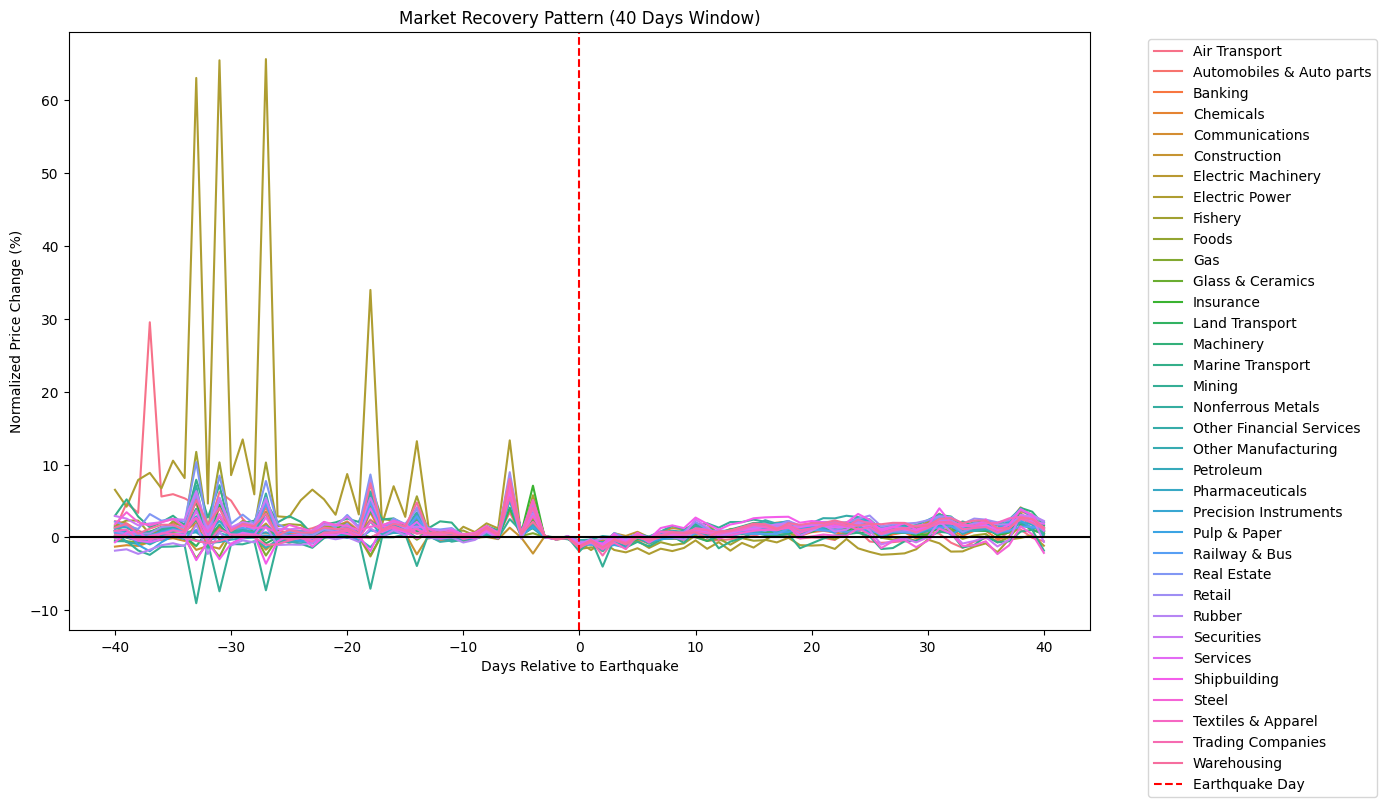

In [30]:
# Visualization
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=agg_results,
    x='days_from_event',
    y='mean_change',
    hue='Industry',
    errorbar=('ci', 95)
)
plt.axvline(0, color='red', linestyle='--', label='Earthquake Day')
plt.axhline(0, color='black', linestyle='-')
plt.title(f'Market Recovery Pattern ({WINDOW_SIZE} Days Window)')
plt.xlabel('Days Relative to Earthquake')
plt.ylabel('Normalized Price Change (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [31]:
# Calculate and sort recovery metrics
recovery_analysis = (
    agg_results[agg_results['days_from_event'] >= 0]
    .groupby('Industry')
    .agg(
        max_impact=('mean_change', lambda x: x.min() if x.min() < 0 else x.max()),
        days_to_recover=('mean_change', lambda x: np.argmax(x >= 0) if any(x >= 0) else np.nan),
        volatility=('std_change', 'mean')
    )
    .reset_index()
    .sort_values('max_impact', ascending=True)  # Sort by most negative impact first
)

print("\nRecovery Metrics (Sorted by Maximum Impact):")
print(recovery_analysis.to_string(index=False))


Recovery Metrics (Sorted by Maximum Impact):
                Industry  max_impact  days_to_recover  volatility
                  Mining   -4.003707                5    8.192494
       Trading Companies   -2.483981                5    7.148257
          Electric Power   -2.374840               39   14.606691
                   Steel   -2.286715                5    9.262966
        Glass & Ceramics   -1.885503                3    8.422963
               Petroleum   -1.843542                5    7.223436
        Marine Transport   -1.806879                8    9.431292
       Nonferrous Metals   -1.777269                5    9.045636
               Machinery   -1.638446                5    8.680440
      Textiles & Apparel   -1.613583                5    6.406944
                 Fishery   -1.579189               10    7.630269
               Chemicals   -1.501144                5    7.511309
Automobiles & Auto parts   -1.493540                5    8.333677
      Electric Machinery   -1.

## Metric Definitions:
#### - max_impact: The largest percentage drop in stock prices immediately after an earthquake.
#### - days_to_recover: Time (in days) for stock prices to return to pre-earthquake levels.
#### - volatility: Magnitude of price fluctuations during the recovery period (higher = more instability).

## Key Observations
#### 1.	All industries experienced negative stock price impacts (all 'max_impact' values are negative), suggesting earthquakes generally correlate with short-term market declines.
#### 2.	Recovery times vary widely: Some industries rebounded in 2–5 days (e.g., Glass & Ceramics, Securities), while others took weeks (e.g., Electric Power: 39 days).
#### 3.	Volatility is highest in industries with prolonged recovery (e.g., Electric Power: 14.6 volatility), indicating prolonged uncertainty.


## Industry-Specific Insights:
#### Most Impacted Industries: 
#### Mining: 
##### - Max Impact: -4% (highest decline).
##### - Recovery: 5 days (relatively fast).
##### - Volatility: 8.19 (moderate).
##### - Why? Mining is directly affected by earthquakes (disrupted operations, damaged infrastructure). Fast recovery suggests investors expect short-term disruptions but no long-term damage.
#### Electric Power:
##### - Max Impact: -2.37%.
##### - Recovery: 39 days (slowest).
##### - Volatility: 14.6 (highest).
##### - Why? Power infrastructure damage causes prolonged outages and uncertainty. High volatility reflects ongoing risks (e.g., repair delays, regulatory scrutiny).
#### Trading Companies, Steel, Petroleum:
##### - Fast recovery (3–5 days) despite moderate declines.
##### - Why? These industries may have supply chain redundancies or benefit from post-disaster demand (e.g., steel for reconstruction).

## Suggestion
#### - Investors: Avoid industries with high 'max_impact' and slow recovery (e.g., Electric Power) during seismic activity. Consider short-term volatility in mining.
#### - Companies: High-impact industries (mining, power) should prioritize disaster resilience and investor communication.